Text(0.5, 1.0, 'Ảnh sau khi lọc bằng mean filter với kernel 7')

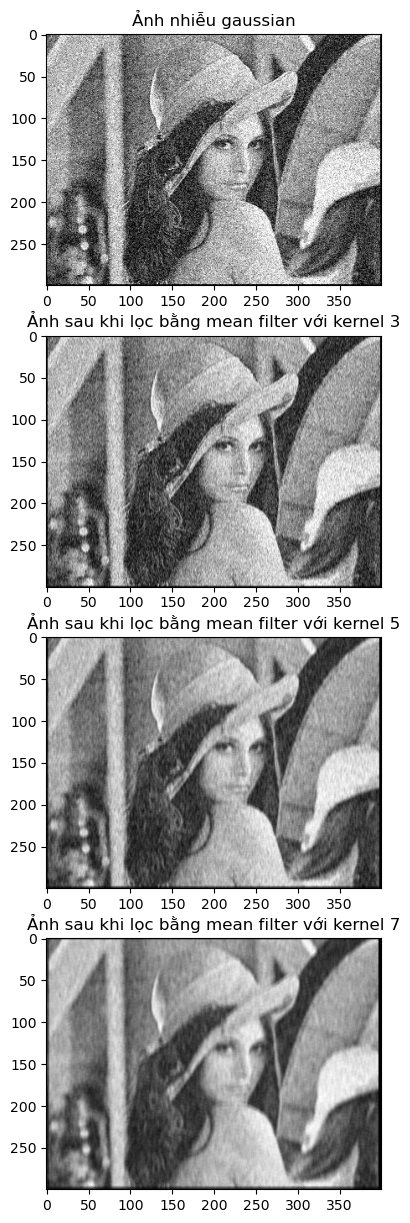

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise

def mean_filter(data, kernel_size):
 temp = []
 kernel_halfsize = kernel_size // 2
 data_final = []
 data_final = np.zeros((len(data),len(data[0])))
 for i in range(len(data)): 
     for j in range(len(data[0])): 
         for z in range(kernel_size):
             if (i + z - kernel_halfsize < 0) or (i + z - kernel_halfsize > len(data) - 1): 
                 for c in range(kernel_size):
                     temp.append(0)
             else: 
                 if (j + z - kernel_halfsize < 0) or (j + kernel_halfsize > len(data[0]) - 1):
                     temp.append(0)
                 else: 
                     for k in range(kernel_halfsize):
                         temp.append(data[i + z - kernel_halfsize][j + k - kernel_halfsize])
         data_final[i][j] = np.mean(temp)
         temp = []
 return data_final

img = Image.open('lena.jpg')
arr = np.array(img)
img_arr = arr[:,:,0]

#anh nhieu gaussian
gauss_img = random_noise(img_arr, mode='gaussian', mean=0, var=0.02)

kernel3 = 3 
kernel5 = 5
kernel7 = 7

plt.figure(figsize=(30, 15))

plt.subplot(4,1,1)
plt.imshow(gauss_img, cmap='gray')
plt.title('Ảnh nhiễu gaussian')
#loc anh nhieu s&p bang median filter
remove_sp_noise = mean_filter(gauss_img, kernel3)
plt.subplot(4,1,2)
plt.imshow(remove_sp_noise, cmap='gray')
plt.title('Ảnh sau khi lọc bằng mean filter với kernel 3')
#loc anh nhieu s&p bang median filter
remove_sp_noise = mean_filter(gauss_img, kernel5)
plt.subplot(4,1,3)
plt.imshow(remove_sp_noise, cmap='gray')
plt.title('Ảnh sau khi lọc bằng mean filter với kernel 5')
#loc anh nhieu s&p bang median filter
remove_sp_noise = mean_filter(gauss_img, kernel7)
plt.subplot(4,1,4)
plt.imshow(remove_sp_noise, cmap='gray')
plt.title('Ảnh sau khi lọc bằng mean filter với kernel 7')